#### <img src="Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />
<hr style="height:2px;border:none"/>
<h1 align='center'> CIV-348 Obras Marítimas - 2019-2 </h1>

<H3 align='center'> Tarea 1   </H3>
<H3 align='center'> Diego Umañana - Jorge Nuñez  </H3>
<H3 align='center'> Bastian Castro - Rodrigo Villalobo  </H3>
<hr style="height:2px;border:none"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('caudales_cambimbo.csv', index_col=0, parse_dates=True)
df_pp = pd.read_csv('Precip_San-Gabriel_SJM.csv', index_col=0, parse_dates=True)


In [3]:
df.describe()

,Q[m³/s]
count,10103.000000
mean,108.812937
std,126.770932
min,1.500000
25%,48.200000
50%,82.100000
75%,130.000000
max,3972.000000


In [4]:
df.head()

,Q[m³/s]
Date,
1990-01-01,143.0
1990-01-02,135.0
1990-01-03,95.8
1990-01-04,89.7
1990-01-05,86.5


In [5]:
df_pp

,Precip[mm]
Date,
1990-01-01,0.0
1990-01-02,0.0
1990-01-03,0.0
1990-01-04,0.0
1990-01-05,0.0
...,...
2018-04-25,0.0
2018-04-26,0.0
2018-04-27,0.0


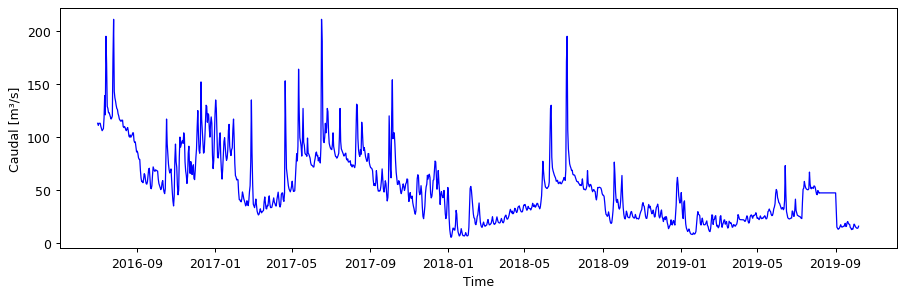

In [44]:
%matplotlib inline
plt.figure(figsize=(12,12), dpi=90)
#plt.figure(figsize=(20,24))
plt.subplot(3,1,1)
#plt.title('Caudal medio diario estación fluviometrica Cambimbao')
plt.xlabel('Time')
plt.ylabel('Caudal [m³/s]')
plt.plot(df['Q[m³/s]']['2016-07':], color='blue', linewidth=1.0)

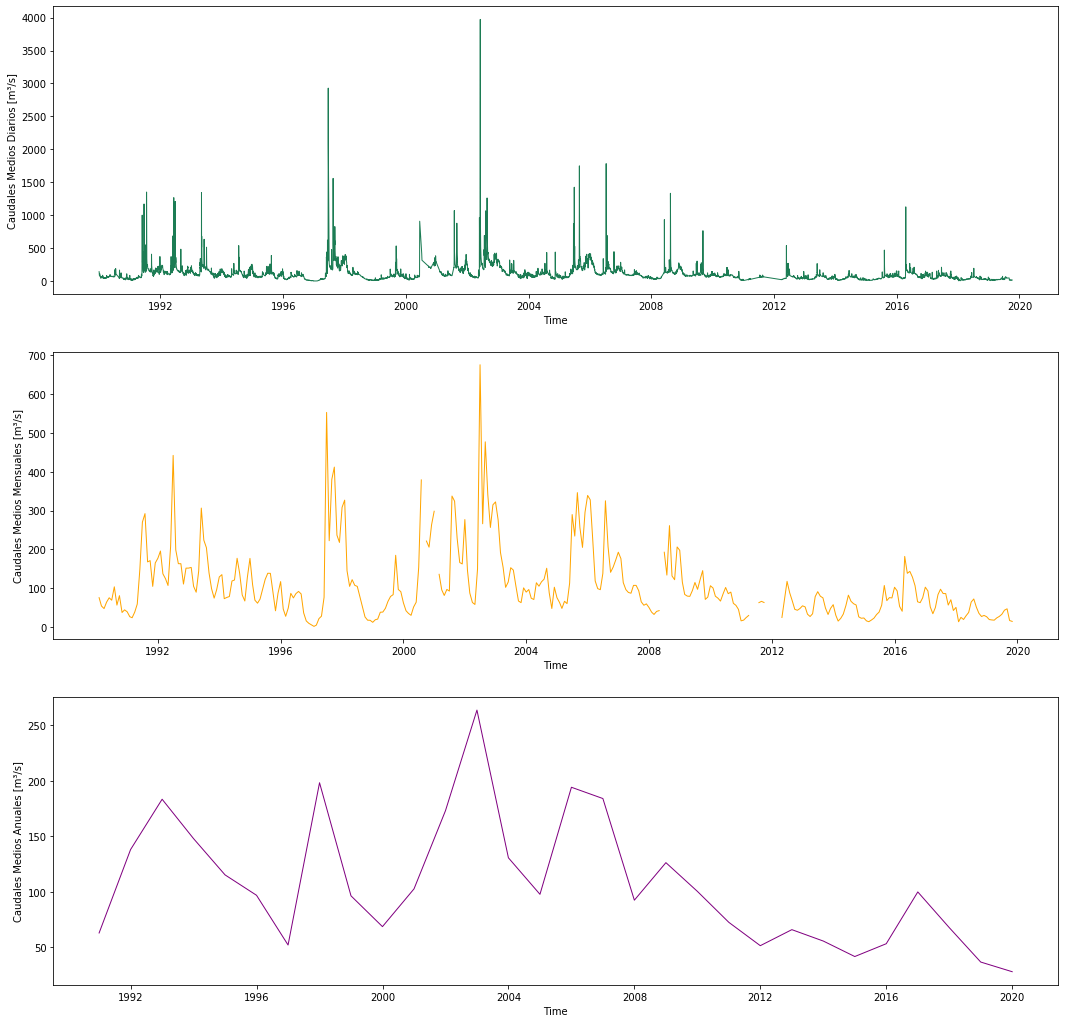

In [7]:
%matplotlib inline
#plt.figure(figsize=(8,4), dpi=90)
plt.figure(figsize=(18,18))

# Create figure, title and plot data
plt.subplot(3,1,1)

plt.xlabel('Time')
plt.ylabel('Caudales Medios Diarios [m³/s]')
plt.plot(df['Q[m³/s]'], color='#1C7C54', linewidth=1.0)


 #Create figure, title and plot resampled data
plt.subplot(3,1,2)

plt.xlabel('Time')
plt.ylabel('Caudales Medios Mensuales [m³/s]')
plt.plot(df['Q[m³/s]'].resample('M').mean(), color='orange', linewidth=1.0)


#Create figure, title and plot resampled data
plt.subplot(3,1,3)

plt.xlabel('Time')
plt.ylabel('Caudales Medios Anuales [m³/s]')
plt.plot(df['Q[m³/s]'].resample('A').mean(), color='purple', linewidth=1.0)

plt.subplots_adjust( hspace=0.2)


plt.show()

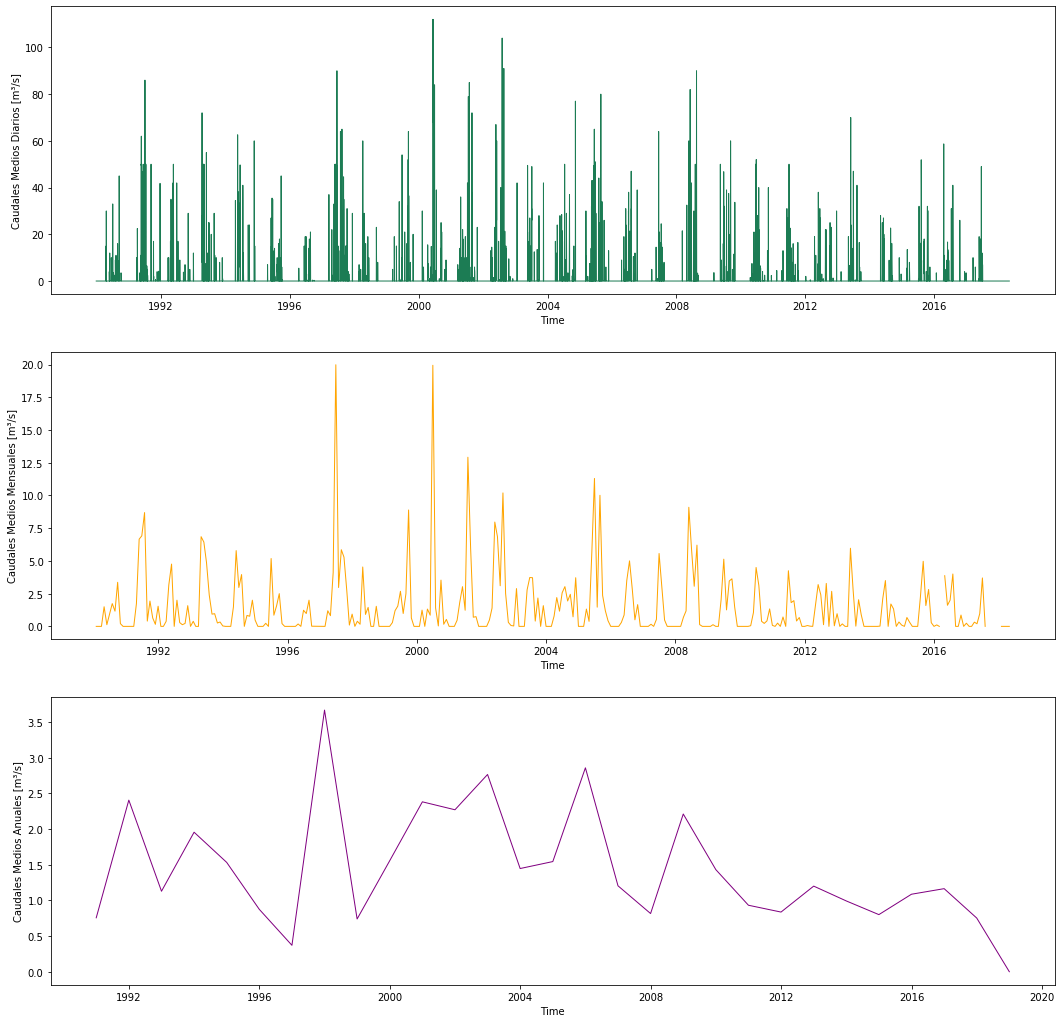

In [8]:
%matplotlib inline
#plt.figure(figsize=(8,4), dpi=90)
plt.figure(figsize=(18,18))

# Create figure, title and plot data
plt.subplot(3,1,1)

plt.xlabel('Time')
plt.ylabel('Caudales Medios Diarios [m³/s]')
plt.plot(df_pp['Precip[mm]'], color='#1C7C54', linewidth=1.0)


 #Create figure, title and plot resampled data
plt.subplot(3,1,2)

plt.xlabel('Time')
plt.ylabel('Caudales Medios Mensuales [m³/s]')
plt.plot(df_pp['Precip[mm]'].resample('M').mean(), color='orange', linewidth=1.0)


#Create figure, title and plot resampled data
plt.subplot(3,1,3)

plt.xlabel('Time')
plt.ylabel('Caudales Medios Anuales [m³/s]')
plt.plot(df_pp['Precip[mm]'].resample('A').mean(), color='purple', linewidth=1.0)

plt.subplots_adjust( hspace=0.2)


plt.show()

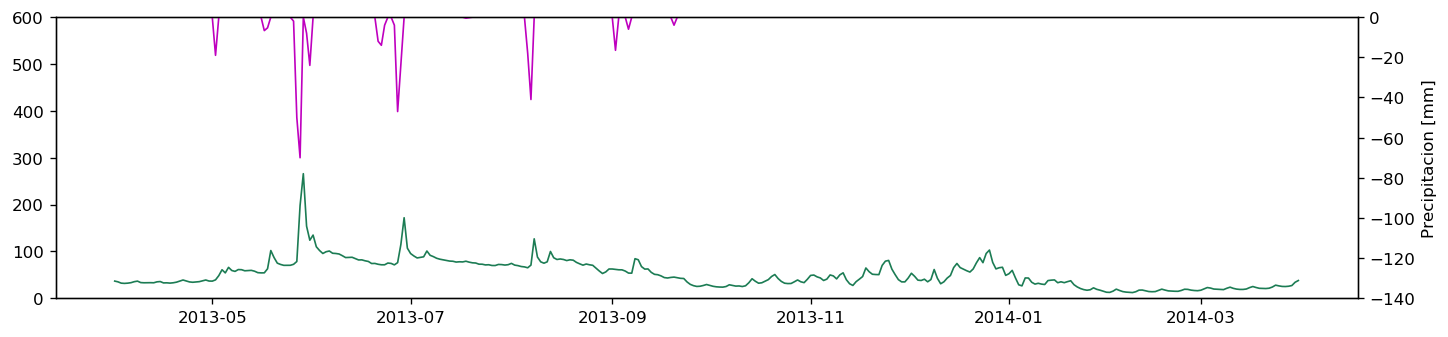

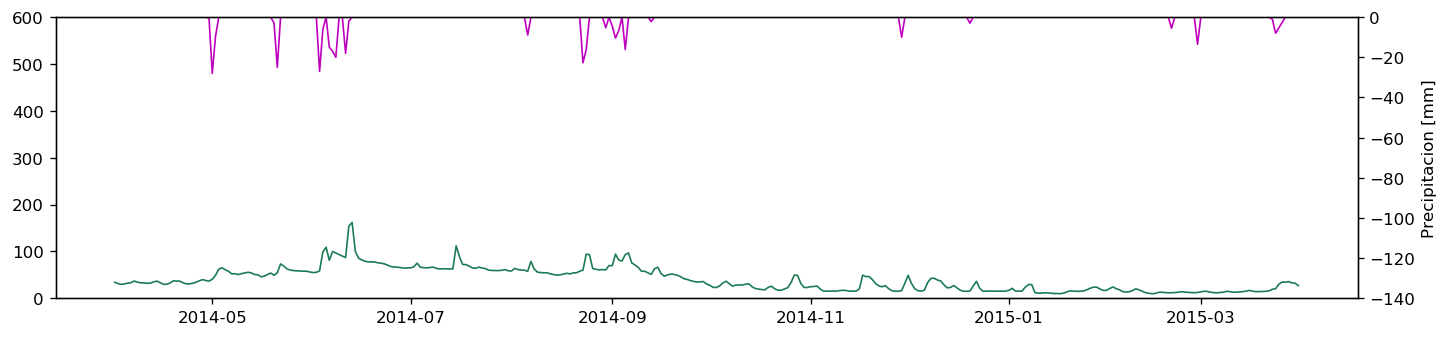

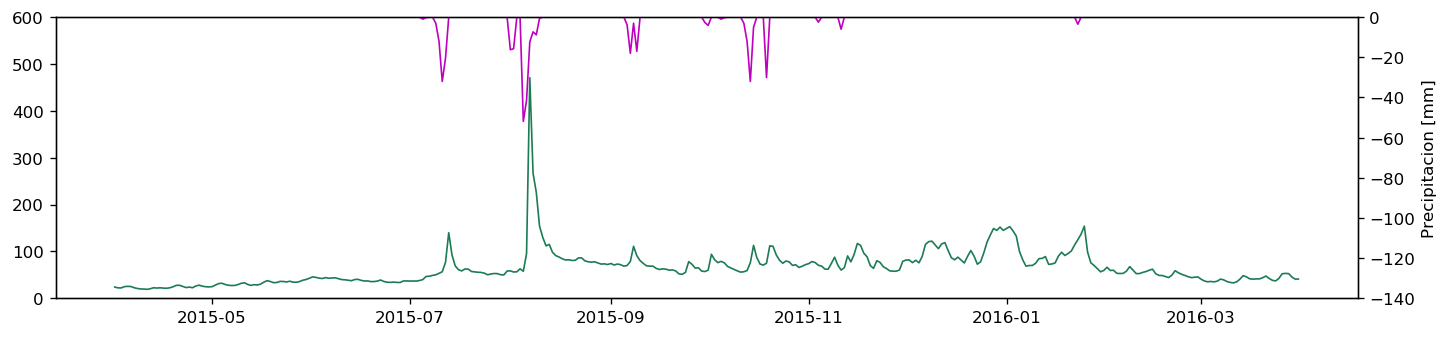

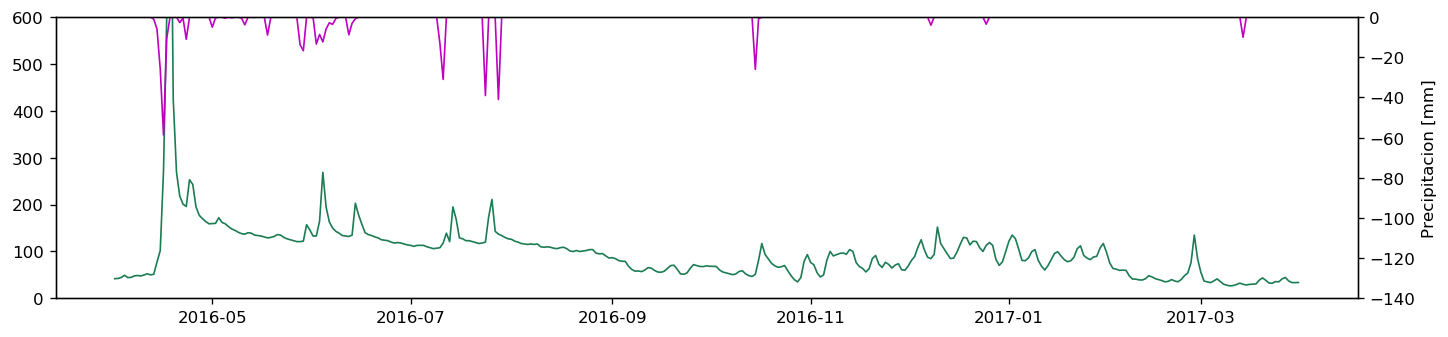

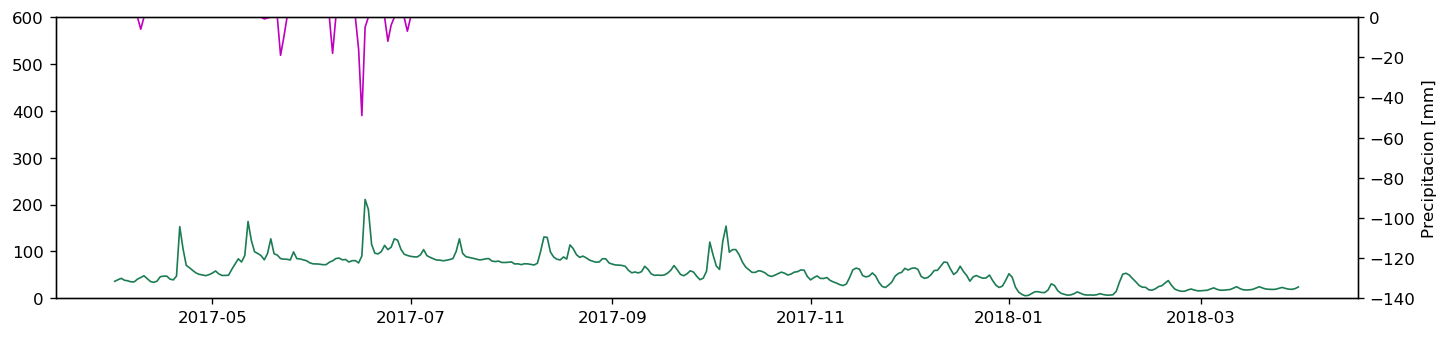

In [9]:
%matplotlib inline
año= 2013
for i in range (5):
    plt.ion()
    plt.figure(figsize=(14,18), dpi=120)
    plt.xlabel('Time')
    plt.ylabel('Caudales Medios Diarios [m³/s]')
    plt.subplot(5,1,i+1)
    plt.plot(df['Q[m³/s]'][str(año+i)+'-04':str(año+i+1)+'-03'], color='#1C7C54', linewidth=1.0)
    plt.ylim(0,600)
    plt.twinx()
    plt.plot(-1*df_pp['Precip[mm]'][str(año+i)+'-04':str(año+i+1)+'-03'], color='m', linewidth=1.0)
    plt.ylim(-140,0)
    plt.ylabel('Precipitacion [mm]')
    

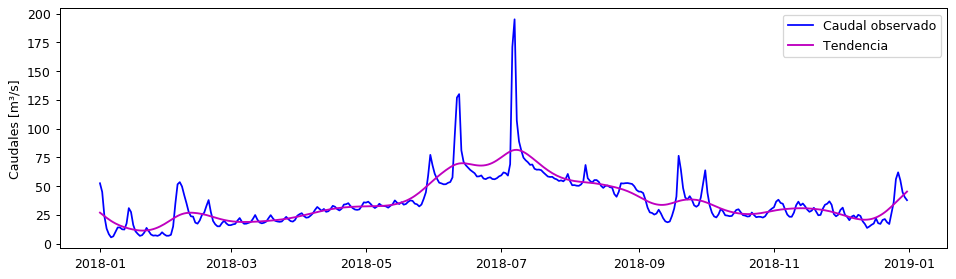

In [45]:
#años = ['2014','2015','2016','2017','2018']
años = ['2018']
j=0
for i in años:
    j+=1
    df2=df.loc[i]
    import statsmodels.api as sm
    caudal_ciclo, caudal_tend = sm.tsa.filters.hpfilter(df2['Q[m³/s]'])
    df2['tend_caudal'] = caudal_tend
    df2['caudal_ciclo']= caudal_ciclo

    # graficando el caudal real con la tendencia.
    plt.figure(figsize=(28,12), dpi=90)
    plt.subplot(3,2,j)
    plt.plot(df2.index,df2['Q[m³/s]'], label = 'Caudal observado',color='blue', linewidth=1.4)
    plt.plot(df2.index,df2['tend_caudal'],label = 'Tendencia', color = 'm')
    plt.ylabel('Caudales [m³/s]')
    #plt.title("Tendencia Caudal año: "+str(i))
    plt.legend(loc='upper right')
    
   # plt.subplots_adjust(top=4, bottom=3, left=0, right=2, hspace=0.8,
    #               wspace=0)
